In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import scipy
import statsmodels.api as sm
pd.options.display.precision = 2

%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
sns.set_context('notebook')
plt.style.use('dark_background')
plt.figure(figsize=(15,10))
sns.set_palette("pastel")

<Figure size 1080x720 with 0 Axes>

In [2]:
y = np.array([4,3,4,5,5,2,3,1,4,0,1,5,5,6,5,4,4,5,3,4])

(0, 8)

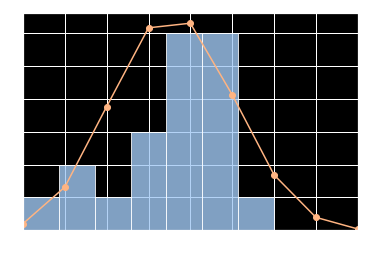

In [4]:
x = np.linspace(0,8,9)
plt.hist(y, bins=7, alpha=0.8)
plt.plot(x, stats.binom.pmf(x, 8, 0.45) * 24, label = 'binominal',marker='o' )
plt.xlim([0,8])

$\sum( y \log(q) + (N-y)\log(1-q))$

In [5]:
L = lambda y, q, N: sum(y * np.log(q) + (N -y) *  np.log(1-q))

In [6]:
step = 100
N = 8.0
b = 0.01
## 初期値
q = [0.3]
l = [L(y, q[0], N)]
for i in range(1,step):
    q_buf = np.random.choice([q[i-1]-b, q[i-1]+b], 1)[0]
    l_buf = L(y, q_buf, N)
    if l_buf > l[i-1]:
        q.append(q_buf)
        l.append(l_buf)
    else:
        q.append(q[i-1])
        l.append(l[i-1])    

In [7]:
def bad_max_L(y, q_ini, step, N, b):
    q = [q_ini]
    L = lambda y, q, N: sum(y * np.log(q) + (N -y) *  np.log(1-q))
    l = [L(y, q[0], N)]
    for i in range(1,step):
        q_buf = np.random.choice([q[i-1]-b, q[i-1]+b], 1)[0]
        l_buf = L(y, q_buf, N)
        if l_buf > l[i-1]:
            q.append(q_buf)
            l.append(l_buf)
        else:
            q.append(q[i-1])
            l.append(l[i-1]) 
            
    return q, l

In [8]:
q1, l1 = bad_max_L(y, 0.3, 100, 8, 0.01)
q2, l2 = bad_max_L(y, 0.6, 100, 8, 0.01)

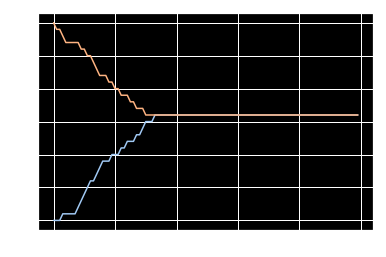

In [9]:
plt.plot(q1)
plt.plot(q2)